In [49]:
import nltk, random
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data import

In [50]:
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


In [51]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)

In [52]:
documents[0][0]

['most',
 'movies',
 'seem',
 'to',
 'release',
 'a',
 'third',
 'movie',
 'just',
 'so',
 'it',
 'can',
 'be',
 'called',
 'a',
 'trilogy',
 '.',
 'rocky',
 'iii',
 'seems',
 'to',
 'kind',
 'of',
 'fit',
 'in',
 'that',
 'category',
 ',',
 'but',
 'manages',
 'to',
 'be',
 'slightly',
 'unique',
 '.',
 'the',
 'rocky',
 'formula',
 'of',
 '"',
 'rocky',
 'loses',
 'fight',
 '/',
 'rocky',
 'trains',
 '/',
 'rocky',
 'wins',
 'fight',
 '"',
 'is',
 'carried',
 'out',
 'to',
 'the',
 'letter',
 '.',
 'also',
 'the',
 "'",
 'tradition',
 "'",
 'of',
 'showing',
 'the',
 'last',
 'five',
 'minutes',
 'or',
 'so',
 'from',
 'the',
 'past',
 'rocky',
 'film',
 'is',
 'used',
 'as',
 'well',
 '.',
 'this',
 'movie',
 'begins',
 'with',
 'a',
 'series',
 'of',
 'clips',
 'showing',
 'how',
 'famous',
 'rocky',
 '(',
 'sylvester',
 'stallone',
 ')',
 'has',
 'become',
 '.',
 '.',
 '.',
 'even',
 'showing',
 'a',
 'brief',
 'appearance',
 'on',
 'sesame',
 'street',
 '!',
 '!',
 'then',
 'it',

In [53]:
documents[0][1]

'pos'

In [54]:
from collections import Counter
sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

Counter({'pos': 1000, 'neg': 1000})


## Cleaning Data

In [55]:
def clean_tokens(tokens):
    return remove_not_alphanumeric(remove_stopwords(tokens))

def remove_not_alphanumeric(tokens):
  return  [token for token in tokens if token.isalnum()]


def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens


In [56]:
clean_documents =[]
for document in documents:
  clean_documents.append((clean_tokens(document[0]),document[1]))

In [57]:
clean_documents[0][0]

['movies',
 'seem',
 'release',
 'third',
 'movie',
 'called',
 'trilogy',
 'rocky',
 'iii',
 'seems',
 'kind',
 'fit',
 'category',
 'manages',
 'slightly',
 'unique',
 'rocky',
 'formula',
 'rocky',
 'loses',
 'fight',
 'rocky',
 'trains',
 'rocky',
 'wins',
 'fight',
 'carried',
 'letter',
 'also',
 'tradition',
 'showing',
 'last',
 'five',
 'minutes',
 'past',
 'rocky',
 'film',
 'used',
 'well',
 'movie',
 'begins',
 'series',
 'clips',
 'showing',
 'famous',
 'rocky',
 'sylvester',
 'stallone',
 'become',
 'even',
 'showing',
 'brief',
 'appearance',
 'sesame',
 'street',
 'moves',
 'rocky',
 'fixed',
 'fight',
 'thunderlips',
 'hulk',
 'hogan',
 'mysterious',
 'bad',
 'ass',
 'known',
 'clubber',
 'lang',
 'mr',
 'trash',
 'talks',
 'rocky',
 'stupid',
 'decision',
 'retire',
 'boxing',
 'pities',
 'fool',
 'coming',
 'fighting',
 'outright',
 'rocky',
 'trainer',
 'burgess',
 'meredith',
 'tells',
 'rocky',
 'fight',
 'italian',
 'stallion',
 'listen',
 'naturally',
 'gets',
 

## Text Processing

In [15]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

def word_lematizer(tokens):
  roots=[]
  for token in tokens:
      # lemma = lemmatizer.lemmatize(token, pos='n')
      lemma = wn._morphy(token, "n")
      if lemma:
        roots.append(min(lemma, key=len))
      else:
        roots.append(ps.stem(token))
  return roots

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fernankiwi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

ps = PorterStemmer()
wordNetLemmatizer = WordNetLemmatizer()

def word_lematizer(tokens):
  roots=[]
  for token in tokens:
      lemma = wn._morphy(token, "n")
      # lemma = wordNetLemmatizer.lemmatize(token, pos='a')
      if lemma:
        roots.append(min(lemma, key=len))
      else:
        roots.append(ps.stem(token))
  return roots

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fernankiwi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_lg")

def spacy_lemmatizer(tokens):
    lemmas = []
    for token in tokens:
        doc = nlp(token)
        lemmas.append(doc[0].lemma_)  # Access the lemma of the first token in the document
    return lemmas

# Example usage
result = spacy_lemmatizer(["futures", "Futures", "Economic", "playful", "played", "technologies", "skills", "knowledge", "education"])
print(result)

['future', 'future', 'economic', 'playful', 'play', 'technology', 'skill', 'knowledge', 'education']


In [27]:
import string

# All ASCII characters
all_ascii_characters = string.printable

# Exclude (words, letters, apostrophes, commas)
exclude_characters = string.ascii_letters + string.digits + "'" + ","
non_word_ascii_characters = [char for char in all_ascii_characters if char not in exclude_characters]

['!', '"', '#', '$', '%', '&', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c']


In [23]:
word_lematizer(["futures", "economics", "Futures","Economic","play","played", "plays", "playful", "playing", "running","gallouter"])

['future',
 'economics',
 'futur',
 'econom',
 'play',
 'play',
 'play',
 'play',
 'playing',
 'running',
 'gallout']

In [60]:
roots_documents =[]
for document in clean_documents:
  roots_documents.append((word_lematizer(document[0]),document[1]))

In [61]:
roots_documents[0][0]

['movie',
 'seem',
 'release',
 'third',
 'movie',
 'call',
 'trilogy',
 'rocki',
 'iii',
 'seem',
 'kind',
 'fit',
 'category',
 'manag',
 'slightli',
 'uniqu',
 'rocki',
 'formula',
 'rocki',
 'lose',
 'fight',
 'rocki',
 'train',
 'rocki',
 'win',
 'fight',
 'carri',
 'letter',
 'also',
 'tradition',
 'showing',
 'last',
 'five',
 'minute',
 'past',
 'rocki',
 'film',
 'use',
 'well',
 'movie',
 'begin',
 'series',
 'clip',
 'showing',
 'famou',
 'rocki',
 'sylvest',
 'stallon',
 'becom',
 'even',
 'showing',
 'brief',
 'appearance',
 'sesame',
 'street',
 'move',
 'rocki',
 'fix',
 'fight',
 'thunderlip',
 'hulk',
 'hogan',
 'mysteri',
 'bad',
 'as',
 'known',
 'clubber',
 'lang',
 'mr',
 'trash',
 'talk',
 'rocki',
 'stupid',
 'decision',
 'retir',
 'boxing',
 'pity',
 'fool',
 'coming',
 'fighting',
 'outright',
 'rocki',
 'trainer',
 'burgess',
 'meredith',
 'tell',
 'rocki',
 'fight',
 'italian',
 'stallion',
 'listen',
 'natur',
 'get',
 'as',
 'kick',
 'somewhere',
 'along',


## Vectorization BoW

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(roots_documents, test_size = 0.33, random_state=42)
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))

Counter({'neg': 674, 'pos': 666})
Counter({'pos': 334, 'neg': 326})


In [63]:
X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
vectorizer.get_feature_names_out()

array(['00', '000', '007', ..., 'zweibel', 'zwick', 'zzzzzzz'],
      dtype=object)

In [65]:
X_train_bow.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

## Using an ML model

In [66]:
from sklearn import svm

model_svm = svm.SVC(C=8.0, kernel='linear')
model_svm.fit(X_train_bow, y_train)

SVC(C=8.0, kernel='linear')

In [67]:
X_test_bow= vectorizer.transform(X_test)

In [68]:
model_svm.predict(X_test_bow[:10])

array(['pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'pos'], dtype='<U3')

In [69]:
print(model_svm.score(X_test_bow, y_test))

0.8212121212121212


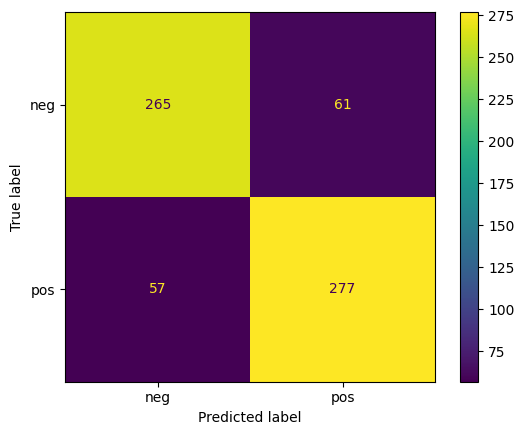

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_svm, X_test_bow, y_test)

## Lets try it

In [73]:
from nltk.tokenize import word_tokenize
n = '''I really dont like this movie, cast is terrible and most of the plot is boring '''
tokens = word_tokenize(n)
tokens =clean_tokens(tokens)
lemmas = word_lematizer(tokens)
vector = vectorizer.transform([" ".join(lemmas)])
model_svm.predict(vector)

array(['neg'], dtype='<U3')